This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


# Project: Investigate a Dataset - [No-show Appointments / may-2016.csv]

## Table of Contents

1)ScheduledDay’ tells us on what day the patient set up their appointment.
     (2)Neighborhood’ indicates the location of the hospital.
     (3)Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    (4)No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [73]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#Data Analysis
import pandas as pd
import numpy as np
from datetime import datetime as dt

#data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

print("Importing Done")
#from scipy import stats  




Importing Done


In [55]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## General properties




In [74]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [75]:
#explor the shape of data
df.shape

(110527, 14)

In [76]:
#reading dataset in general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


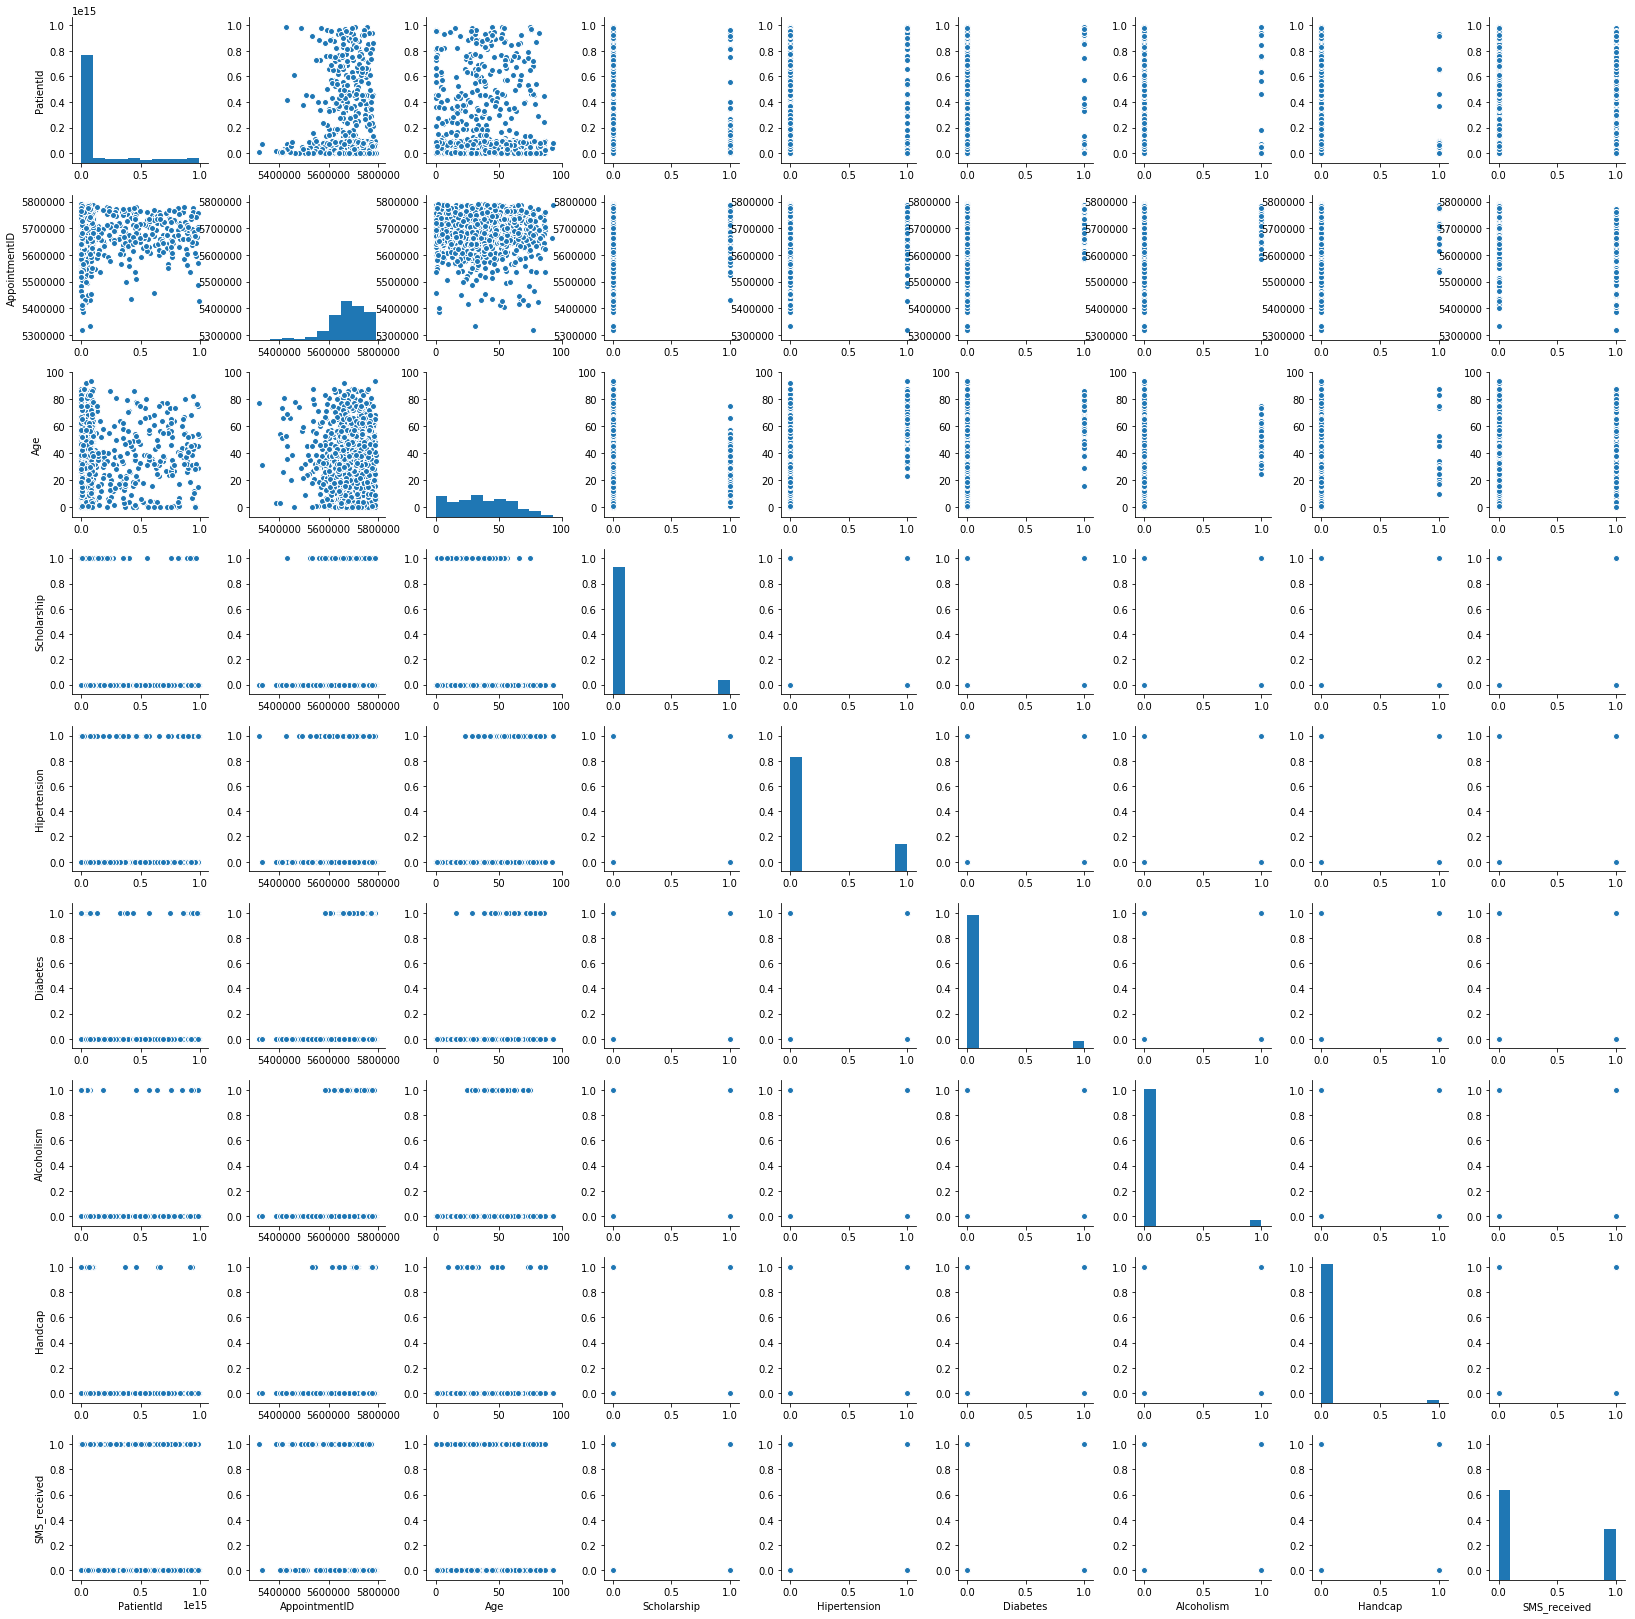

In [77]:
sns.pairplot(df.sample(1000));

In [78]:
#check if there any missing values Or data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [79]:
#check for duplication
df.duplicated().sum()

0

In [80]:
#check for un unique value 
df['PatientId'].nunique()


62299

In [81]:
#check no of duplicated IDS of patient
df['PatientId'].duplicated().sum()

48228

In [82]:
#check for duplication patient and noshow
df.duplicated(['PatientId','No-show']).sum()

38710

In [83]:
#more information about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [84]:
#Identfy the row index of -1 value of age 
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [85]:
#unique value for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [86]:

# count appointment numbers for each age
df['Age'].value_counts()



 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [87]:

# check the age datas by order
df_age = df['Age'].unique()
df_age.sort()
print('age', df_age)
#same to == print('Age:', sorted(df['Age'].unique()))



age [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [88]:
# drop the data with age < 0 and age >=98
df = df[(df.Age >= 0) & (df.Age < 98)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110508 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110508 non-null float64
AppointmentID     110508 non-null int64
Gender            110508 non-null object
ScheduledDay      110508 non-null object
AppointmentDay    110508 non-null object
Age               110508 non-null int64
Neighbourhood     110508 non-null object
Scholarship       110508 non-null int64
Hipertension      110508 non-null int64
Diabetes          110508 non-null int64
Alcoholism        110508 non-null int64
Handcap           110508 non-null int64
SMS_received      110508 non-null int64
No-show           110508 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [89]:
# extract only 'yyyy-mm-dd' from the string including time
df['ScheduledDay'] = df['ScheduledDay'].str[0:10]
df['AppointmentDay'] = df['AppointmentDay'].str[0:10]

# verify if the extration has been done correctly
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [90]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [91]:
# check the age datas by order
df_age = df['Age'].unique()
df_age.sort()
print('age', df_age)
#same to == print('Age:', sorted(df['Age'].unique()))

age [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97]



### Data Cleaning
At this stage, we will delete the wrong data that affects the results of the analysis and also delete the unimportant data.
 

In [92]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# create a boxplot of the age using seaborn


#rename 3 column
df.rename(columns={'Handcap':'Handicap','Hipertension':'hypertension','No-show':'No_show'}, inplace=True )
#Verving if renaming true 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110508 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110508 non-null float64
AppointmentID     110508 non-null int64
Gender            110508 non-null object
ScheduledDay      110508 non-null object
AppointmentDay    110508 non-null object
Age               110508 non-null int64
Neighbourhood     110508 non-null object
Scholarship       110508 non-null int64
hypertension      110508 non-null int64
Diabetes          110508 non-null int64
Alcoholism        110508 non-null int64
Handicap          110508 non-null int64
SMS_received      110508 non-null int64
No_show           110508 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [94]:
df['No_show'].value_counts()

No     88193
Yes    22315
Name: No_show, dtype: int64

In [95]:
# define the percentage function, total here is the number of rows
def percentage(number, total):
    return number / total

In [96]:

# calculate the percentage of patients did not presented
df_nshow = df[df.No_show == 'Yes']
number_noshow = df_nshow['No_show'].count()
per_noshow = percentage(number_noshow, total = 110508)
print(per_noshow)



0.201931081913


In [97]:

# calculate the percentage of patients who presented
df_show = df[df['No_show'] == 'No']
number_show = df_show['No_show'].count()
per_show = percentage(number_show, total = 110508)
print(per_show)



0.798068918087


In [98]:

# calculate mean
df['Age'].mean()


37.078374416331847

<a id='eda'></a>
## Exploratory Data Analysis

Exploratory Data Analysis

After we've cleaned up the data,now we are ready to move on to exploration, such as calculating statistics and graphics to address the research questions you asked in the Introduction section.

### Research Question 1 (Replace this header name!)

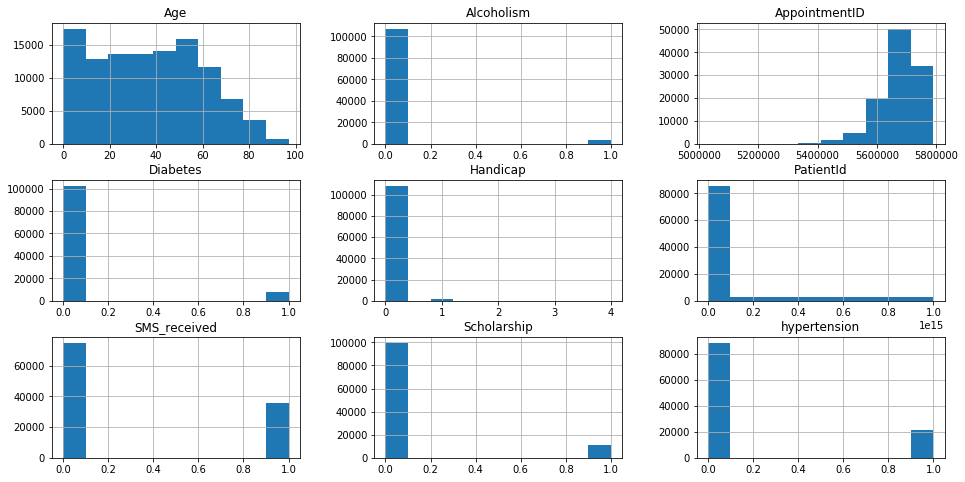

In [99]:

df.hist(figsize=(16,8));



### Research Question 2  (Replace this header name!)

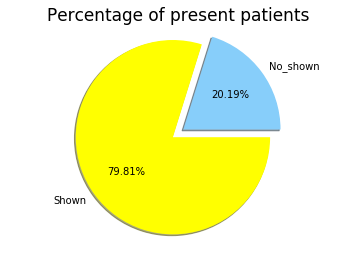

In [100]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# draw a pie graph to show the percentage of the patients presented or not
sizes = np.array([per_noshow, per_show])
labels = 'No_shown', 'Shown'
colors = ["lightskyblue", "Yellow"]
explode = [0.2, 0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%', radius = 1.5)
plt.title('Percentage of present patients', fontsize = 17, loc = 'center', color = 'k')
plt.axis('equal') 
# equal aspect ratio to ensure that pie is drawn as a circle
plt.show()


In [101]:
# count number of shown and non-shown patients by gender
df_g = df['No_show'].groupby(df['Gender']).value_counts()
# display the result
df_g

Gender  No_show
F       No         57234
        Yes        14590
M       No         30959
        Yes         7725
Name: No_show, dtype: int64

Text(0,0.5,'Number of patient')

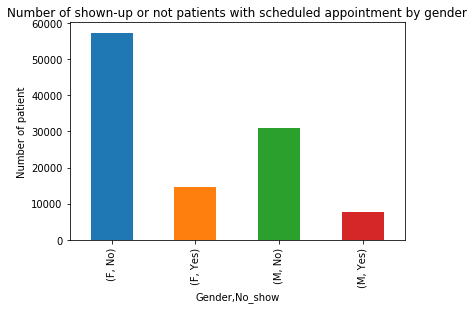

In [102]:
#Number of shown-up or not patients with scheduled appointment by gender
df_g.plot(x=['No_shown', 'Shown'], y=['No', 'Yes'], kind ='bar', title = 'Number of shown-up or not patients with scheduled appointment by gender')
plt.ylabel('Number of patient')

In [103]:

# calculate total female patients
df_f = df[df['Gender'] == 'F']
total_f = df_f['Gender'].count()
# calculate percentage of female patients no-shown-up and shown-up
df_fns = df_f[df_f.No_show == 'Yes']
number_fns = df_fns.No_show.count()
per_fns = percentage(number_fns, total_f) 
#percentage of female no-shown-up
per_fs = 1-per_fns 
#percentage of female shown-up
print(per_fns, per_fs)



0.203135442192 0.796864557808


In [106]:
# calculate total male patients
df_m = df[df['Gender'] == 'M']
total_m = df_m['Gender'].count()
# calculate percentage of male patients no-shown-up and shown-up
df_mns = df_m[df_m.No_show == 'Yes']
number_mns = df_mns.No_show.count()
per_mns = percentage(number_mns, total_m) 
#percentage of female no-shown-up
per_ms = 1-per_mns 
#percentage of female shown-up
print(per_mns, per_ms)

0.199694964326 0.800305035674


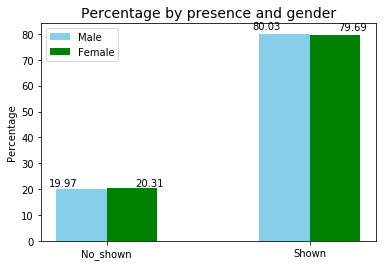

In [107]:
#Figer out the presence and gender 
#gender does  affect the attendance rate or not ??
#percentage of presence of gender 
f = (round(per_fns*100,2), round(per_fs*100,2))
m = (round(per_mns*100,2), round(per_ms*100,2))
ind = np.arange(len(m))
width = 0.25

fig,ax = plt.subplots()
rects1 = ax.bar(ind - width/2, m, width,
                color='SkyBlue', label='Male')
rects2 = ax.bar(ind + width/2, f, width,
                color='Green', label='Female')

ax.set_ylabel('Percentage')
ax.set_title('Percentage by presence and gender', fontsize = 14)
ax.set_xticks(ind)
ax.set_xticklabels(('No_shown', 'Shown'))
ax.legend()

def autolabel(rects, xpos='center'):

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")
plt.show()

In [ ]:
#From the previous two figures, we conclude that gender does not affect the attendance rate, but the percentage of sick women is higher than men


<a id='conclusions'></a>
## Conclusions
1) Overall, there wasn't a huge difference in age for those who did or didn't show up to appointments. I believe the difference would have been bigger had the group who did show up for appointments not been nearly 4 times larger than the group of people who didn't show up for appointments.

2) While the age differences aren't very wide, the people who didn't show up to appointments tended to be younger and that is also the same for whether or not these 2 groups of people had healthcare scholarships. Again, this is also possibly caused by the fact that the No-show=Yes group is about 4 times smaller than the other group.

3) Overall, after exploring and cleaning this dataset - I don't believe there is definitive proof that either Age nor Scholarship status has an impact on whether or not a person shows up for their appointment or not. This > is partly due to the fact that the number of people who did show up for appointments was nearly four times more than the number of people who didn't show up for appointments.

### Limitations
1) Given that Scholarship only has 0 or 1 for possible answers - it was tough to find good visuals that would also be able to work with Scholarship and still provide some insight and be easy to understand.

2) Lots of the columns used categorical data which makes it more difficult to analyze and visualize. This in turn somewhat hinders the ability to find any strong correlations between columns.

3) Again, the unbalance split between the No-show Yes and No-show No groups did't allow for a truly balanced or > equal analysis to be done but at the same time this uneven split showed some potentially interesting areas that > could be further explored.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0